# HWK1 

## You are expected to analyze data from a few meteorological stations and 
## draw conclusions regarding how typical extreme values are

we will be using the data from 
https://climatologia.meteochile.gob.cl/

where you are supposed to create an account.



## 1. Available data

You are encuraged to look at the available data from stations

220002_HR.csv   290004_HR.csv   330019_HR.csv   330077_HR.csv   330077_UV.csv

Farellones 330077
La Serena 290004
Calama 220002
Tobalaba 330019


Each one with HR humidity data, and also UV (ultra violet data).


## 2. New data

Once logged in you should be able to visualize the month by month output from individual stations, and parameter like:

https://climatologia.meteochile.gob.cl/application/informacion/datosMensualesDelElemento/330077/2012/1/94

where 330077 is in Farellones, and 94 is the code for HR (humidity)

You are expected to 

In [1]:
from astropy.time import Time
import pandas as pd


In [2]:
pdf = pd.read_csv('data/330077_UV.csv')

In [3]:
pdf

,Unnamed: 0,datetime,mjd,UV,year,month,day,hour,minute,date
0,0,2012-01-01T10:00:00.000,55927.416667,0.03,2012,1,1,10,0,2012-01-01
1,1,2012-01-01T11:00:00.000,55927.458333,0.56,2012,1,1,11,0,2012-01-01
2,2,2012-01-01T12:00:00.000,55927.500000,2.32,2012,1,1,12,0,2012-01-01
3,3,2012-01-01T13:00:00.000,55927.541667,5.58,2012,1,1,13,0,2012-01-01
4,4,2012-01-01T14:00:00.000,55927.583333,9.54,2012,1,1,14,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
34679,34679,2022-12-31T19:00:00.000,59944.791667,3.37,2022,12,31,19,0,2022-12-31
34680,34680,2022-12-31T20:00:00.000,59944.833333,2.11,2022,12,31,20,0,2022-12-31
34681,34681,2022-12-31T21:00:00.000,59944.875000,1.54,2022,12,31,21,0,2022-12-31
34682,34682,2022-12-31T22:00:00.000,59944.916667,0.99,2022,12,31,22,0,2022-12-31


In [4]:
import numpy as np
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


date 2012-12-01 failed, 
date 2012-12-02 failed, 
date 2012-12-03 failed, 
date 2012-12-04 failed, 
date 2012-12-05 failed, 
date 2012-12-06 failed, 
date 2012-12-07 failed, 
date 2012-12-08 failed, 
date 2012-12-09 failed, 
date 2012-12-10 failed, 
date 2012-12-11 failed, 
date 2012-12-12 failed, 
date 2012-12-13 failed, 
date 2012-12-14 failed, 
date 2012-12-15 failed, 
date 2012-12-16 failed, 
date 2012-12-17 failed, 
date 2012-12-18 failed, 
date 2012-12-19 failed, 
date 2012-12-20 failed, 
date 2012-12-21 failed, 
date 2012-12-22 failed, 
date 2012-12-23 failed, 
date 2012-12-24 failed, 
date 2012-12-25 failed, 
date 2012-12-26 failed, 
date 2012-12-27 failed, 
date 2013-12-01 failed, 
date 2013-12-02 failed, 
date 2013-12-03 failed, 
date 2013-12-04 failed, 
date 2013-12-05 failed, 
date 2013-12-06 failed, 
date 2013-12-07 failed, 
date 2013-12-08 failed, 
date 2013-12-09 failed, 
date 2013-12-10 failed, 
date 2013-12-11 failed, 
date 2013-12-12 failed, 
date 2013-12-13 failed, 


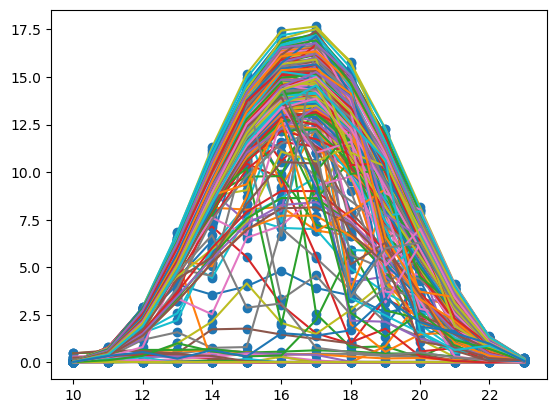

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

filt = pdf['month'] == 12
plt.scatter(pdf['hour'][filt], pdf['UV'][filt])
cv= []
eff=[]
err=[]


for d in pdf[filt]['date'].unique():
    ff = pdf[filt]['date']==d
    plt.plot(pdf['hour'][filt][ff], pdf['UV'][filt][ff])
    try:
        coeff, var_matrix = curve_fit(gauss, pdf['hour'][filt][ff], pdf['UV'][filt][ff], p0=p0)
        cv.append([coeff,var_matrix])
        eff.append(np.sqrt(np.diag(var_matrix)))
        diff = pdf['UV'][filt][ff] - gauss(pdf['hour'][filt][ff], *coeff)
    except:
        print('date %s failed, '%(d))
        cv.append([None,None])
        eff.append(None)
        diff = pdf['UV'][filt][ff]
    err.append(np.sum(diff*diff/2.))

In [6]:
# Plot multiple histograms in 3D
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

def plot_station(data=None, zvar='HR', yvar='month', xmin=0, xmax=100, dx=3., title=""):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    """                                                                                                                                                    
    Scaling is done from here...                                                                                                                           
    """
    x_scale=3
    y_scale=3
    z_scale=2

    scale=np.diag([x_scale, y_scale, z_scale, 1.0])
    scale=scale*(1.0/scale.max())
    scale[3,3]=1.0

    def short_proj():
      return np.dot(Axes3D.get_proj(ax), scale)

    ax.get_proj=short_proj
    """                                                                                                                                                    
    to here                                                                                                                                                
    """

    ndots = int(100/dx)

    # bins in HR
    bins = np.linspace(xmin,xmax,ndots+1)
    x = np.convolve([.5,.5],bins,'valid') # np.linspace(0,100,ndots)
    y = np.sort(data[yvar].unique())

    X,Y = np.meshgrid(x,y)

    Z = np.zeros((len(y),len(x)))
    Zbins = np.zeros((len(y),len(x)+1))

    for i in range(len(y)):
        # add filter for nighttime    
        filttime = (data['hour']>=20)+(data['hour']<6)
        filt = (data[yvar]==y[i]) * filttime
        Z[i], Zbins[i] = np.histogram(data[zvar][filt],bins=bins, density=True)
        print('Month %d, percentage over 85%% %.2f'%(y[i], 100*np.sum(Z[i][int(.85*ndots):])/np.sum(Z[i])))

    for i in range(len(y)):
        ax.plot(X[i], Y[i], Z[i],  color='k', lw=.5)

    ax.zaxis.set_visible(False)
    ax.get_zaxis().set_ticks([])
    ax.get_zaxis().set_visible(False)
    ax.set_xlabel("HR")
    ax.set_ylabel("mes")

    plt.savefig(title+'.png')
    
    plt.show()
    fig.show()

In [7]:
import pickle
pdf = pickle.load( open('data/HRdata.pkl','r'))
plot_station(data=pdf['330077'])

TypeError: a bytes-like object is required, not 'str'

In [8]:
ls  data

220002_HR.csv  330019_HR.csv  330077_UV.csv
290004_HR.csv  330077_HR.csv  HRdata.pkl


In [9]:
pickle.load(open('data/HRdata.pkl','r'))

TypeError: a bytes-like object is required, not 'str'

In [10]:
open('data/HRdata.pkl','r')

<_io.TextIOWrapper name='data/HRdata.pkl' mode='r' encoding='UTF-8'>

In [11]:
hr_colorado = pd.read_csv('data/330077_HR.csv')
hr_calama = pd.read_csv('data/220002_HR.csv')

<IPython.core.display.Javascript object>


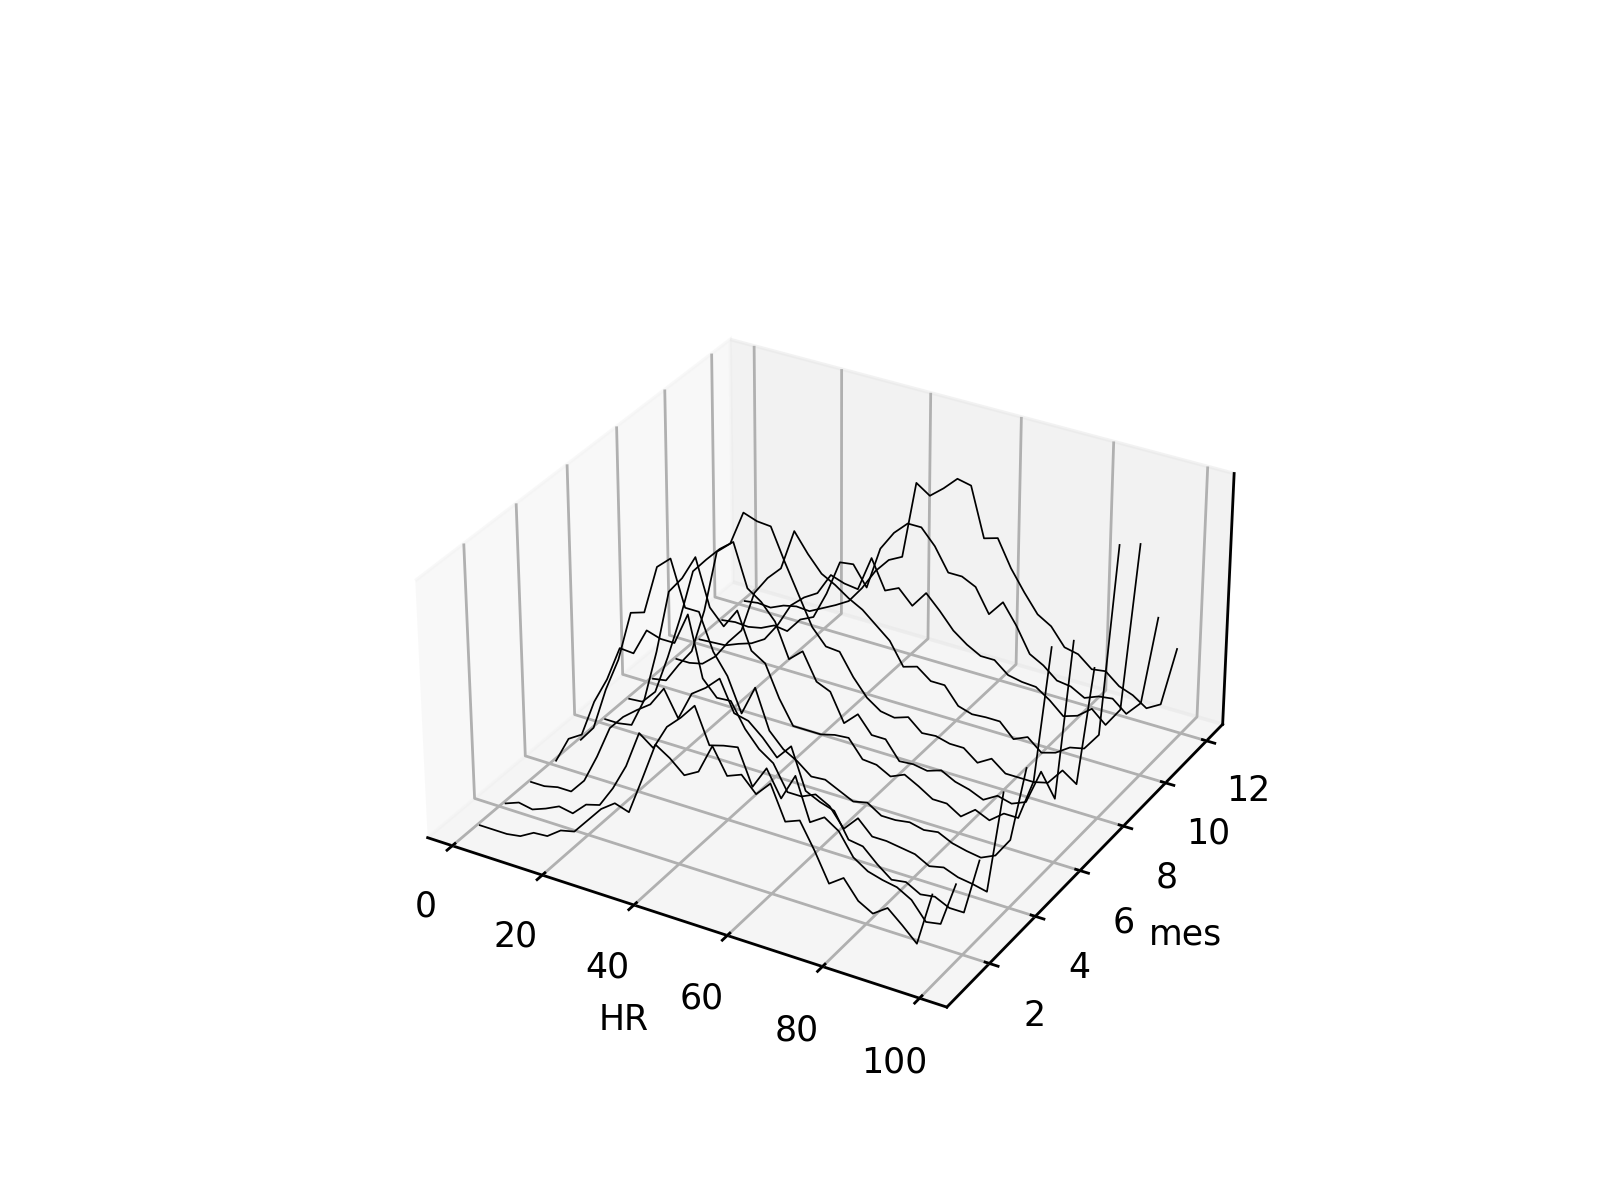

Month 1, percentage over 85% 9.83
Month 2, percentage over 85% 7.64
Month 3, percentage over 85% 4.48
Month 4, percentage over 85% 6.42
Month 5, percentage over 85% 7.66
Month 6, percentage over 85% 15.64
Month 7, percentage over 85% 13.61
Month 8, percentage over 85% 10.15
Month 9, percentage over 85% 16.91
Month 10, percentage over 85% 17.91
Month 11, percentage over 85% 12.13
Month 12, percentage over 85% 6.85


In [12]:
plot_station(hr_colorado)

<IPython.core.display.Javascript object>


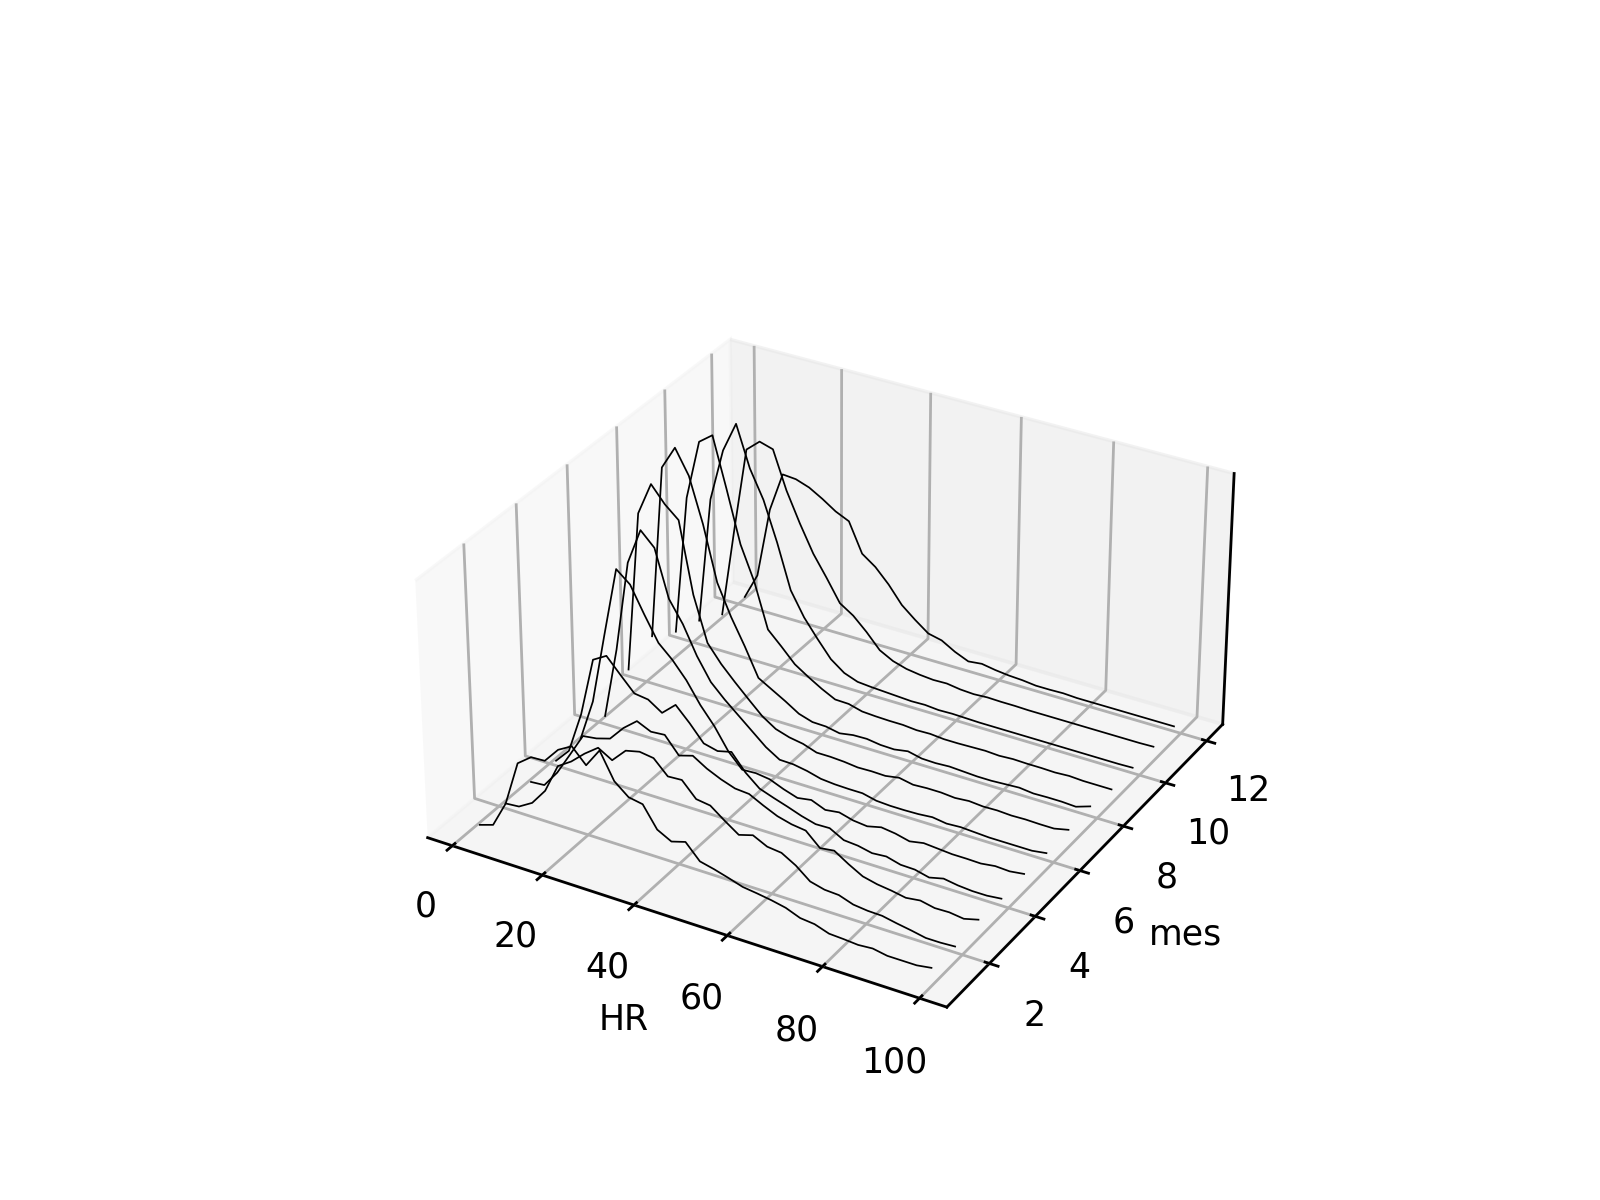

Month 1, percentage over 85% 0.79
Month 2, percentage over 85% 0.68
Month 3, percentage over 85% 1.02
Month 4, percentage over 85% 0.61
Month 5, percentage over 85% 0.78
Month 6, percentage over 85% 0.16
Month 7, percentage over 85% 0.27
Month 8, percentage over 85% 0.51
Month 9, percentage over 85% 0.06
Month 10, percentage over 85% 0.03
Month 11, percentage over 85% 0.03
Month 12, percentage over 85% 0.00


In [13]:
plot_station(hr_calama)

In [14]:
normalize()

NameError: name 'normalize' is not defined

In [15]:
pwd

'/Users/cfuentes/Software/astroinformatica'

In [16]:
ls